# Apple Disease Detection

### Imports

In [1]:
import os
import pandas as pd
import glob as gb
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

## Step 1: Data Loading and Exploration

In [2]:
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Train"
TEST_DIR = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Test"
BATCH_SIZE=64

### Reading Images

In [3]:
for folder in os.listdir(TRAINING_DIR):
    files = gb.glob(pathname= str(TRAINING_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 67 in folder Normal_Apple
For training data, found 114 in folder Rot_Apple
For training data, found 116 in folder Blotch_Apple
For training data, found 82 in folder Scab_Apple


In [4]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 30 in folder Blotch_Apple
For testing data, found 38 in folder Rot_Apple
For testing data, found 24 in folder Normal_Apple
For testing data, found 27 in folder Scab_Apple


## Step 2: Visualize Random Images

In [5]:
def view_random_image(target_dir, target_class):

    target_folder = target_dir + target_class


    random_image = random.sample(os.listdir(target_folder),1)


    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [6]:
class_names = ['Blotch_Apple','Normal_Apple','Rot_Apple','Scab_Apple']

Image shape (408, 612, 3)
Image shape (280, 393, 3)
Image shape (320, 379)
Image shape (185, 272, 3)
Image shape (283, 286, 3)
Image shape (228, 221, 3)
Image shape (320, 450, 3)
Image shape (225, 225, 3)
Image shape (1920, 1590, 3)
Image shape (320, 450, 3)
Image shape (320, 315, 3)
Image shape (214, 236, 3)


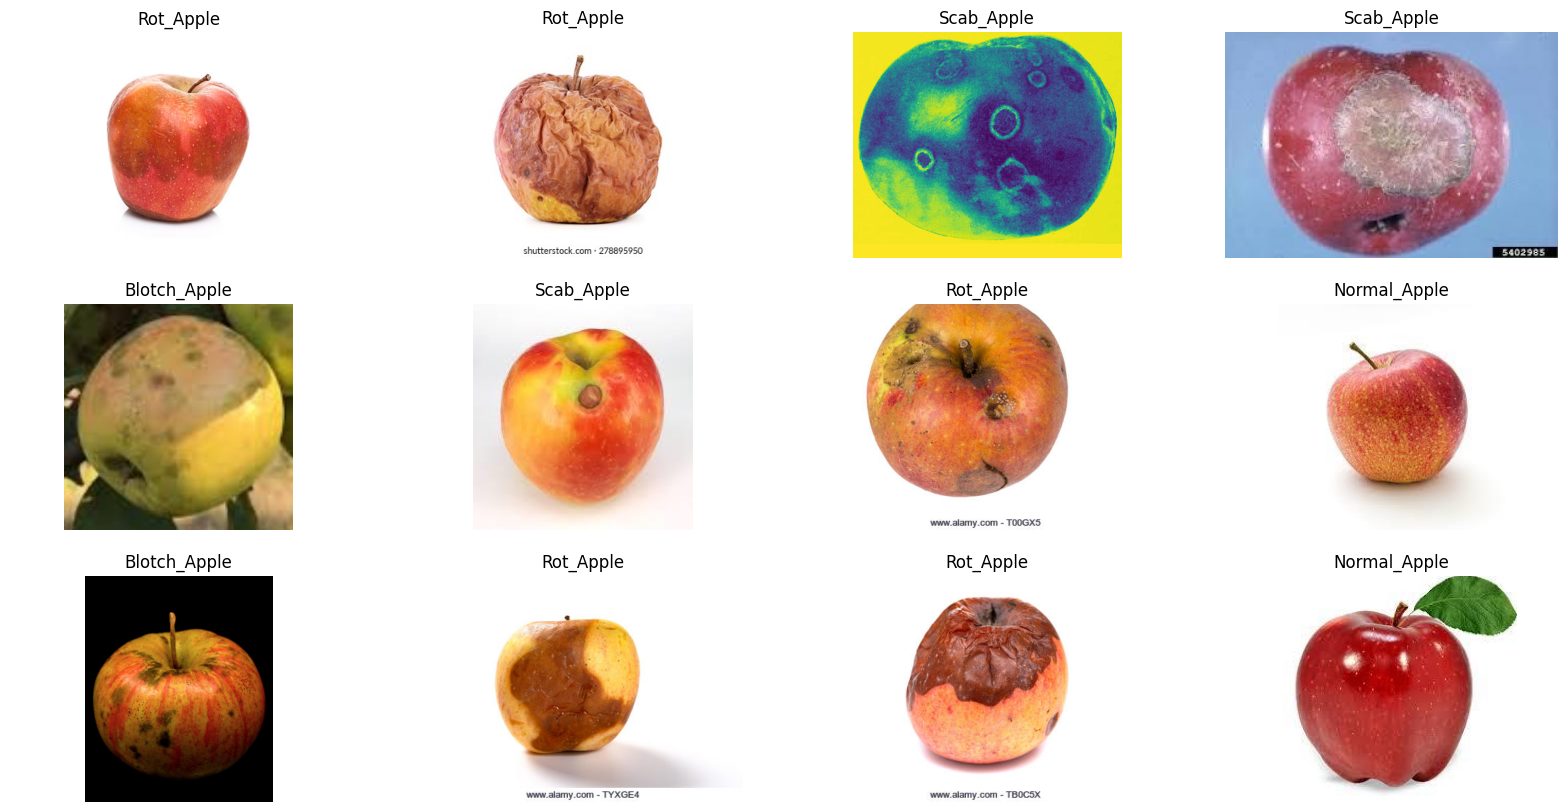

In [7]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=TRAINING_DIR+"/", target_class=class_name)

## Step 3: Data Augmentation

In [8]:
def train_val_generators(TRAINING_DIR, TEST_DIR):

  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 45,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')


  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 20,
                                                      class_mode= 'categorical',
                                                      target_size=(224, 224))


  validation_datagen = ImageDataGenerator( rescale = 1.0/255.0 )


  validation_generator = validation_datagen.flow_from_directory(directory= TEST_DIR,
                                                                batch_size= 20,
                                                                class_mode= 'categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator


In [9]:
train_generator, test_generator = train_val_generators(TRAINING_DIR, TEST_DIR)

Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


## Step 4: Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


## Step 5: Model Compilation and Summary

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

## Step 6: Model Training

In [12]:
checkpoint = ModelCheckpoint(filepath='weights.best.hdf5', monitor='val_loss', save_best_only=True)
history = model.fit(train_generator, validation_data=test_generator, epochs=150, steps_per_epoch=len(train_generator), validation_steps=len(test_generator), callbacks=[checkpoint])

Epoch 1/150
20/20 [==============================] - 93s 4s/step - loss: 1.8586 - accuracy: 0.3037 - val_loss: 1.3642 - val_accuracy: 0.3167
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 7s 349ms/step - loss: 1.3572 - accuracy: 0.3586 - val_loss: 1.3140 - val_accuracy: 0.3417
Epoch 3/150
20/20 [==============================] - 7s 350ms/step - loss: 1.2640 - accuracy: 0.4529 - val_loss: 1.2136 - val_accuracy: 0.4750
Epoch 4/150
20/20 [==============================] - 8s 406ms/step - loss: 1.2714 - accuracy: 0.5131 - val_loss: 1.0428 - val_accuracy: 0.5750
Epoch 5/150
20/20 [==============================] - 8s 386ms/step - loss: 1.1585 - accuracy: 0.5733 - val_loss: 1.6273 - val_accuracy: 0.3500
Epoch 6/150
20/20 [==============================] - 7s 347ms/step - loss: 1.0949 - accuracy: 0.5393 - val_loss: 1.1900 - val_accuracy: 0.5167
Epoch 7/150
20/20 [==============================] - 8s 403ms/step - loss: 1.0583 - accuracy: 0.5654 - val_loss: 1.2907 - val_accuracy: 0.5000
Epoch 8/150
20/20 [==============================] - 8s 402ms/step - loss: 1.0599 - accuracy: 0.6230 - val_loss: 1.0495 - val_accuracy: 0.5333
Epoch 9/150

### Plot the results

## Step 7: Training Visualization

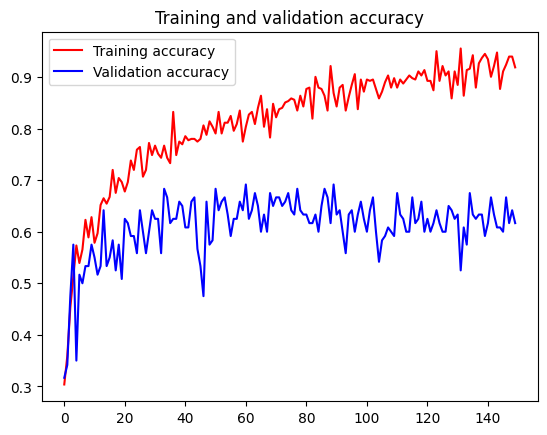

<Figure size 640x480 with 0 Axes>

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Step 8: Class Indices

In [14]:
train_generator.class_indices

{'Blotch_Apple': 0, 'Normal_Apple': 1, 'Rot_Apple': 2, 'Scab_Apple': 3}

## Step 9: Prediction

In [19]:
class_names = ['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']

drive_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/img'
for img_name in os.listdir(drive_path):
    img_path = os.path.join(drive_path, img_name)
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_class_idx = np.argmax(classes)
    predicted_class = class_names[predicted_class_idx]
    confidence = np.max(classes)

    print(f"{img_name}: Predicted class: {predicted_class}, Confidence: {confidence}")


1/1 [==============================] - 0s 28ms/step
n_img.jpg: Predicted class: Blotch_Apple, Confidence: 1.0
1/1 [==============================] - 0s 25ms/step
s_img.jpg: Predicted class: Scab_Apple, Confidence: 1.0
1/1 [==============================] - 0s 25ms/step
b_img.jpg: Predicted class: Normal_Apple, Confidence: 1.0
1/1 [==============================] - 0s 30ms/step
r_img.jpg: Predicted class: Scab_Apple, Confidence: 1.0
1/1 [==============================] - 0s 29ms/step
b_img2.jpg: Predicted class: Scab_Apple, Confidence: 1.0


## Step 10: Exporting the model

In [16]:
# Save the entire model
model.save('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/model/apple_disease_model.h5')

# Or, save only the weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/model/apple_disease_model_weights.h5')
